In [125]:
!activate tf_gpu
%reload_ext autoreload
%autoreload 2
%matplotlib inline

/bin/sh: 1: activate: not found


In [126]:
from fastai import *
from fastai.vision import *
from matplotlib import pyplot as plt
from PIL import Image

### Dataset

In [127]:
path = untar_data(URLs.CIFAR_100)
print(path)
print(path.ls())

/root/.fastai/data/cifar100
[PosixPath('/root/.fastai/data/cifar100/train'), PosixPath('/root/.fastai/data/cifar100/test'), PosixPath('/root/.fastai/data/cifar100/models')]


In [130]:
path_train = path/'train'
path_test = path/'test'

In [131]:
tfms = (get_transforms(
    do_flip=True,
    flip_vert=False,
    max_rotate=25))

In [140]:
data = (ImageDataBunch.from_folder(
    path_train, 
    valid_pct=.15,
    ds_tfms=tfms,
    size=100,
    test='test',
    bs=32)
         .normalize(imagenet_stats))

In [141]:
print(data)

ImageDataBunch;

Train: LabelList (42500 items)
x: ImageList
Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100)
y: CategoryList
chimpanzee,chimpanzee,chimpanzee,chimpanzee,chimpanzee
Path: /root/.fastai/data/cifar100/train;

Valid: LabelList (7500 items)
x: ImageList
Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100)
y: CategoryList
possum,tractor,otter,apple,ray
Path: /root/.fastai/data/cifar100/train;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: /root/.fastai/data/cifar100/train


### Model & Train 1

In [142]:
model = models.resnet50
learn = cnn_learner(data, model, metrics=[error_rate, accuracy]).mixup()

In [143]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.753391,1.412963,0.391467,0.608533,01:11
1,2.377372,1.079191,0.306133,0.693867,01:10
2,2.217309,0.948751,0.269200,0.730800,01:10
3,2.106662,0.873426,0.245067,0.754933,01:10
4,2.107006,0.854225,0.243467,0.756533,01:11


### Train 2

In [144]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 4.79E-06
Min loss divided by 10: 3.02E-04


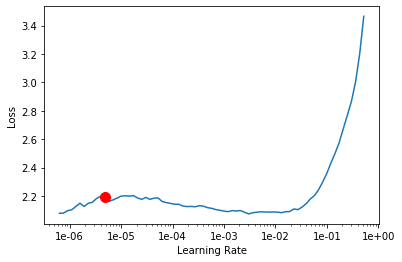

In [145]:
learn.recorder.plot(suggestion=True)

In [146]:
lr = learn.recorder.min_grad_lr

In [147]:
learn.fit_one_cycle(3, max_lr=lr)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.074711,0.859819,0.243467,0.756533,01:10
1,2.078954,0.853638,0.240933,0.759067,01:10
2,2.048012,0.853028,0.238267,0.761733,01:10


### TTA

In [148]:
preds, y = learn.TTA()

In [149]:
accuracy(preds, y)

tensor(0.7736)

### Saving model

In [150]:
learn.save('77%.mdl')

- Time taken: 8 minutes
- Accuracy: 76%
- Test accuracy: 77%